In [1]:
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
labelencoder = LabelEncoder()



# Dowload the data

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

sample = pd.read_csv('sample_submission.csv')
df = pd.concat([train, test])

# Exploring data

In [3]:
df.isnull().sum()

ID             0
Datetime       0
Count       5112
dtype: int64

In [4]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8.0
1,1,25-08-2012 01:00,2.0
2,2,25-08-2012 02:00,6.0
3,3,25-08-2012 03:00,2.0
4,4,25-08-2012 04:00,2.0
...,...,...,...
5107,23395,26-04-2015 19:00,NaN
5108,23396,26-04-2015 20:00,NaN
5109,23397,26-04-2015 21:00,NaN
5110,23398,26-04-2015 22:00,NaN


In [39]:
train

,ID,Datetime,Count,date,year,month,day,hour,ndate,weekday,Date2
0,0,25-08-2012 00:00,8,2012-08-25 00:00:00,2012,8,25,0,2012-08-25,5,734740
1,1,25-08-2012 01:00,2,2012-08-25 01:00:00,2012,8,25,1,2012-08-25,5,734740
2,2,25-08-2012 02:00,6,2012-08-25 02:00:00,2012,8,25,2,2012-08-25,5,734740
3,3,25-08-2012 03:00,2,2012-08-25 03:00:00,2012,8,25,3,2012-08-25,5,734740
4,4,25-08-2012 04:00,2,2012-08-25 04:00:00,2012,8,25,4,2012-08-25,5,734740
...,...,...,...,...,...,...,...,...,...,...,...
18283,18283,25-09-2014 19:00,868,2014-09-25 19:00:00,2014,9,25,19,2014-09-25,3,735501
18284,18284,25-09-2014 20:00,732,2014-09-25 20:00:00,2014,9,25,20,2014-09-25,3,735501
18285,18285,25-09-2014 21:00,702,2014-09-25 21:00:00,2014,9,25,21,2014-09-25,3,735501
18286,18286,25-09-2014 22:00,580,2014-09-25 22:00:00,2014,9,25,22,2014-09-25,3,735501


In [5]:
df['Datetime'].describe()

count                23400
unique               23400
top       18-04-2014 07:00
freq                     1
Name: Datetime, dtype: object

In [6]:
df.groupby(['Datetime']).size()

Datetime
01-01-2013 00:00    1
01-01-2013 01:00    1
01-01-2013 02:00    1
01-01-2013 03:00    1
01-01-2013 04:00    1
                   ..
31-12-2014 19:00    1
31-12-2014 20:00    1
31-12-2014 21:00    1
31-12-2014 22:00    1
31-12-2014 23:00    1
Length: 23400, dtype: int64

In [7]:
df.sort_values(by=['Datetime'])

,ID,Datetime,Count
3096,3096,01-01-2013 00:00,20.0
3097,3097,01-01-2013 01:00,44.0
3098,3098,01-01-2013 02:00,28.0
3099,3099,01-01-2013 03:00,8.0
3100,3100,01-01-2013 04:00,14.0
...,...,...,...
2323,20611,31-12-2014 19:00,NaN
2324,20612,31-12-2014 20:00,NaN
2325,20613,31-12-2014 21:00,NaN
2326,20614,31-12-2014 22:00,NaN


In [8]:
from datetime import datetime

train['date'] = pd.to_datetime(train['Datetime'])

test['date'] = pd.to_datetime(test['Datetime'])

#df.timestamp.dt.strftime('%Y-%m-%d')



In [9]:
train

,ID,Datetime,Count,date
0,0,25-08-2012 00:00,8,2012-08-25 00:00:00
1,1,25-08-2012 01:00,2,2012-08-25 01:00:00
2,2,25-08-2012 02:00,6,2012-08-25 02:00:00
3,3,25-08-2012 03:00,2,2012-08-25 03:00:00
4,4,25-08-2012 04:00,2,2012-08-25 04:00:00
...,...,...,...,...
18283,18283,25-09-2014 19:00,868,2014-09-25 19:00:00
18284,18284,25-09-2014 20:00,732,2014-09-25 20:00:00
18285,18285,25-09-2014 21:00,702,2014-09-25 21:00:00
18286,18286,25-09-2014 22:00,580,2014-09-25 22:00:00


In [10]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['hour'] = train['date'].dt.hour
train['ndate']= train['date'].dt.date
train['weekday'] = train['date'].dt.weekday



test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['hour'] = test['date'].dt.hour
test['ndate']= test['date'].dt.date
test['weekday'] = test['date'].dt.weekday



In [11]:
train['weekday']
#0 - Monday, 1- Tuesday, 2 - Wenesd, 3 - Thurs, 4 - Friday, 5 - Saturday, 6 - Sunday
df = pd.concat([train, test])

In [12]:
wd_count = df[['weekday', 'Count']].groupby('weekday').sum()
wd_count

,Count
weekday,
0,382680.0
1,414656.0
2,390116.0
3,399362.0
4,356118.0
5,298952.0
6,299382.0


In [13]:
wd_avg = df[['weekday', 'Count']].groupby('weekday').mean()
wd_avg

,Count
weekday,
0,146.284404
1,158.507645
2,149.126911
3,151.273485
4,138.675234
5,115.336420
6,113.402273


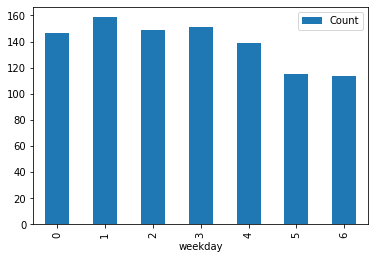

In [14]:
wd_avg.plot.bar()

Text(0.5, 1.0, 'A single plot')

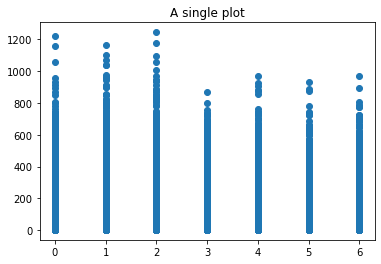

In [15]:
x = train['weekday']
u = train['hour']
w = train['year']
z = train['month']
y = train['Count']
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_title('A single plot')

Text(0.5, 1.0, 'Count by hour')

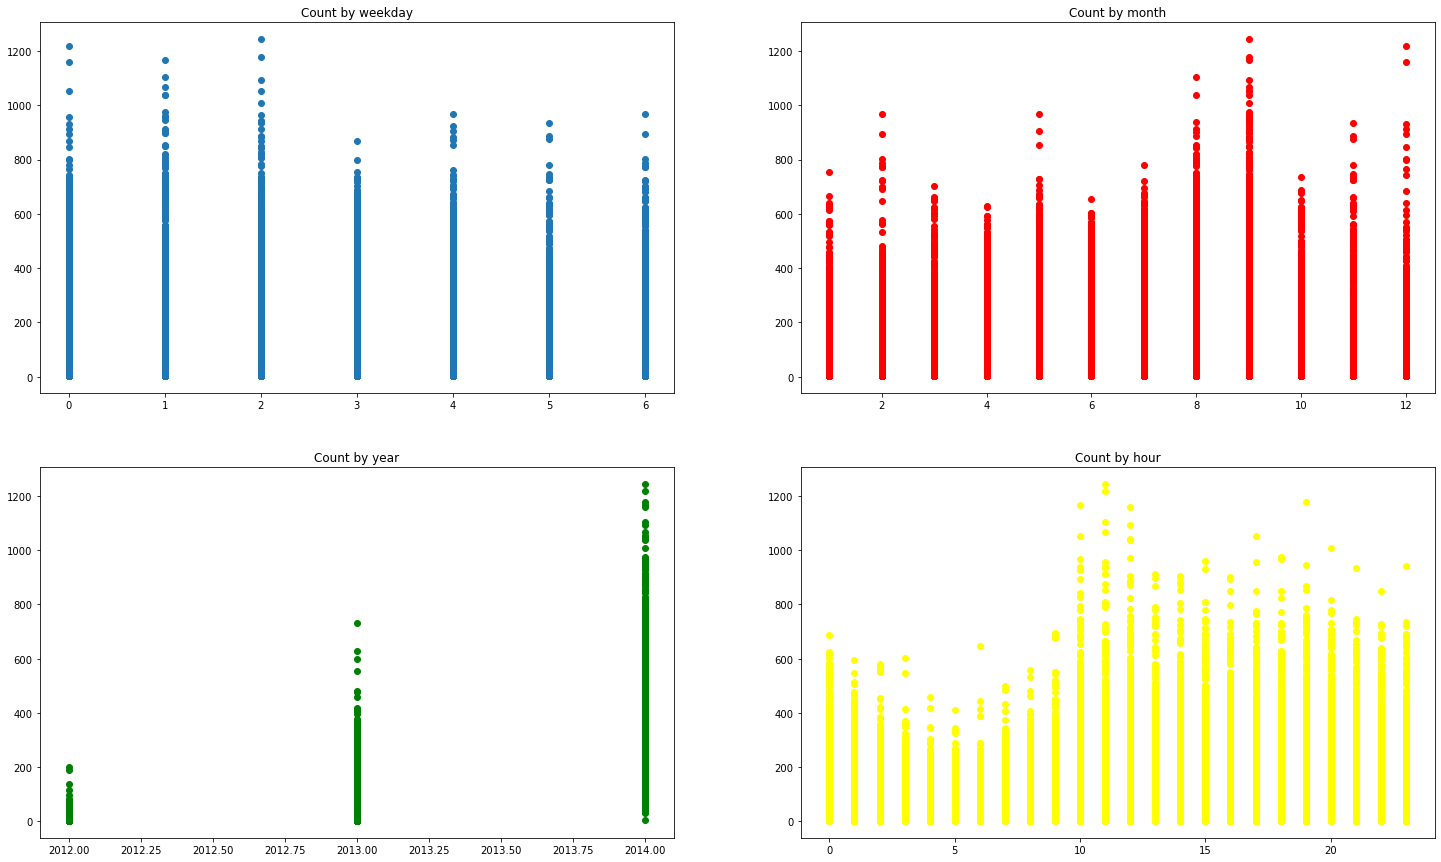

In [16]:
fig, axs = plt.subplots(2, 2,figsize=(25, 15))
axs[0, 0].scatter(x, y)
axs[0, 0].set_title('Count by weekday')
axs[0, 1].scatter(z, y, color = 'red')
axs[0, 1].set_title('Count by month')
axs[1, 0].scatter(w, y, color = 'green')
axs[1, 0].set_title('Count by year')
axs[1, 1].scatter(u, y, color = 'yellow')
axs[1, 1].set_title('Count by hour')

#for ax in axs.flat:
 #   ax.label_outer()


# ML

In [17]:
test

,ID,Datetime,date,year,month,day,hour,ndate,weekday
0,18288,26-09-2014 00:00,2014-09-26 00:00:00,2014,9,26,0,2014-09-26,4
1,18289,26-09-2014 01:00,2014-09-26 01:00:00,2014,9,26,1,2014-09-26,4
2,18290,26-09-2014 02:00,2014-09-26 02:00:00,2014,9,26,2,2014-09-26,4
3,18291,26-09-2014 03:00,2014-09-26 03:00:00,2014,9,26,3,2014-09-26,4
4,18292,26-09-2014 04:00,2014-09-26 04:00:00,2014,9,26,4,2014-09-26,4
...,...,...,...,...,...,...,...,...,...
5107,23395,26-04-2015 19:00,2015-04-26 19:00:00,2015,4,26,19,2015-04-26,6
5108,23396,26-04-2015 20:00,2015-04-26 20:00:00,2015,4,26,20,2015-04-26,6
5109,23397,26-04-2015 21:00,2015-04-26 21:00:00,2015,4,26,21,2015-04-26,6
5110,23398,26-04-2015 22:00,2015-04-26 22:00:00,2015,4,26,22,2015-04-26,6


In [18]:
# separe the data from target
train_data = train.drop(['Count','Datetime','date','ndate','ID'],axis=1)
test_data =test.drop(['Datetime','date','ndate','ID'],axis=1)
train_target = train['Count']
sample
train_data

,year,month,day,hour,weekday
0,2012,8,25,0,5
1,2012,8,25,1,5
2,2012,8,25,2,5
3,2012,8,25,3,5
4,2012,8,25,4,5
...,...,...,...,...,...
18283,2014,9,25,19,3
18284,2014,9,25,20,3
18285,2014,9,25,21,3
18286,2014,9,25,22,3


In [19]:
#LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data,train_target)

LinearRegression()

In [20]:
prediction = model.predict(test_data)

In [21]:
sample


,ID,Count
0,18288,0
1,18289,0
2,18290,0
3,18291,0
4,18292,0
...,...,...
5107,23395,0
5108,23396,0
5109,23397,0
5110,23398,0


In [22]:
submission = pd.DataFrame({"ID":test["ID"],"Count":prediction})
submission.to_csv('submission1.csv', index=False)
submission.head()

,ID,Count
0,18288,256.622694
1,18289,261.099144
2,18290,265.575594
3,18291,270.052043
4,18292,274.528493


In [23]:
train_data

,year,month,day,hour,weekday
0,2012,8,25,0,5
1,2012,8,25,1,5
2,2012,8,25,2,5
3,2012,8,25,3,5
4,2012,8,25,4,5
...,...,...,...,...,...
18283,2014,9,25,19,3
18284,2014,9,25,20,3
18285,2014,9,25,21,3
18286,2014,9,25,22,3


In [36]:
#SVR
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(train_data,train_target)

SVR()

In [37]:
prediction = regressor.predict(test_data)

In [38]:
submission3 = pd.DataFrame({"ID":test["ID"],"Count":prediction})
submission3.to_csv('submission3.csv', index=False)
submission3.head()

,ID,Count
0,18288,83.946019
1,18289,83.956185
2,18290,83.966350
3,18291,83.976517
4,18292,83.986683
